In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv(r"C:\Users\anoop\Downloads\lung_cancer1.csv.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data = data.replace({'YES': 2, 'NO': 1})
data = data.replace({'M': 2, 'F': 1})

In [4]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,2,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,2,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [5]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(data)
labels = gmm.predict(data)
data['labels'] = labels

In [6]:
data['labels']

0      2
1      0
2      1
3      1
4      1
      ..
304    0
305    2
306    0
307    0
308    0
Name: labels, Length: 309, dtype: int64

In [7]:
d0 = data[data['labels']==0]
d1 = data[data['labels']==1]

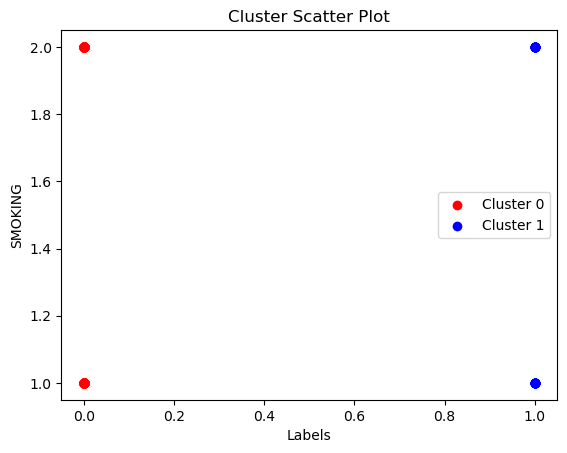

In [8]:
plt.scatter(d0['labels'], d0['SMOKING'], color='red', label='Cluster 0')
plt.scatter(d1['labels'], d1['SMOKING'], color='blue', label='Cluster 1')

plt.xlabel('Labels')
plt.ylabel('SMOKING')
plt.title('Cluster Scatter Plot')
plt.legend()
plt.show()

In [9]:
gmm.lower_bound_

-3.993295370376518

In [10]:
gmm.n_iter_

16